

# Importing Data

In [ ]:
from google.colab import drive

drive.mount('/content/drive', force_remount=True)

import os
os.chdir("/content/drive/My Drive/resolvr")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
# Importing data
import pandas as pd

from pandas import read_excel

my_sheet = 'Case Study 2020' 
file_name = 'Worksheet in Analytics_Case_Resolvr2020.xlsx' 
df = read_excel(file_name, sheet_name = my_sheet)
print(df.head()) 

features=['Customer ID','Gender', 'Customer Type','Age','Type of Travel', 'Class','Flight Distance','Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness','Departure Delay in Minutes','Arrival Delay in Minutes','satisfaction']
X=df[features]       
y=df.satisfaction


from sklearn.model_selection import train_test_split
train_X, test_X, train_y, test_y = train_test_split(X, y, random_state=1)

train = train_X
test = test_X

   Customer ID  Gender  ... Arrival Delay in Minutes  satisfaction
0        70172    Male  ...                     18.0             0
1         5047    Male  ...                      6.0             0
2       110028  Female  ...                      0.0             1
3        24026  Female  ...                      9.0             0
4       119299    Male  ...                      0.0             1

[5 rows x 24 columns]


In [ ]:
# Get row and column count
train.shape

(97410, 24)

In [ ]:
# Get a snapshot of data
train.head(10)

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
35847,13251,Female,Loyal Customer,52,Business travel,Eco,772,3.0,4.0,4.0,4.0,3.0,4.0,4.0,3.0,3.0,3.0,3.0,3.0,3.0,3.0,0,0.0,0
23349,98581,Male,Loyal Customer,45,Business travel,Business,3955,3.0,3.0,4.0,3.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,4.0,1,0.0,1
84249,123287,Female,Loyal Customer,65,Personal Travel,Eco,507,1.0,5.0,1.0,3.0,3.0,4.0,4.0,5.0,5.0,1.0,5.0,3.0,5.0,3.0,0,18.0,0
67988,45949,Male,Loyal Customer,46,Personal Travel,Eco,913,3.0,4.0,3.0,2.0,5.0,3.0,5.0,5.0,3.0,2.0,1.0,2.0,4.0,5.0,0,0.0,0
118556,33905,Female,Loyal Customer,64,Personal Travel,Eco,1226,4.0,4.0,3.0,4.0,2.0,3.0,4.0,2.0,2.0,3.0,2.0,4.0,2.0,4.0,0,NaN,0
93522,117356,Male,Loyal Customer,30,Business travel,Business,2050,3.0,2.0,2.0,2.0,3.0,3.0,3.0,3.0,2.0,2.0,4.0,1.0,3.0,3.0,0,0.0,0
124233,120927,Female,disloyal Customer,27,Business travel,Business,992,3.0,2.0,2.0,2.0,2.0,2.0,4.0,2.0,4.0,2.0,4.0,3.0,5.0,2.0,0,5.0,0
50875,115315,Female,Loyal Customer,56,Business travel,Business,325,3.0,3.0,3.0,3.0,3.0,4.0,4.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,28,27.0,1
105423,29642,Male,Loyal Customer,43,Personal Travel,Eco,1448,0.0,4.0,0.0,3.0,3.0,0.0,3.0,3.0,3.0,3.0,1.0,3.0,5.0,3.0,0,0.0,1
54407,35059,Male,disloyal Customer,25,Business travel,Eco,1010,2.0,2.0,2.0,4.0,1.0,2.0,1.0,1.0,5.0,5.0,5.0,5.0,4.0,1.0,0,0.0,0


In [ ]:
# Drop unnecessary columns

train = train.drop('Customer ID', axis=1)

In [ ]:
# Check size of the data set
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 97410 entries, 35847 to 128037
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             97410 non-null  object 
 1   Customer Type                      97410 non-null  object 
 2   Age                                97410 non-null  int64  
 3   Type of Travel                     97410 non-null  object 
 4   Class                              97410 non-null  object 
 5   Flight Distance                    97410 non-null  int64  
 6   Inflight wifi service              97407 non-null  float64
 7   Departure/Arrival time convenient  97407 non-null  float64
 8   Ease of Online booking             97408 non-null  float64
 9   Gate location                      97403 non-null  float64
 10  Food and drink                     97408 non-null  float64
 11  Online boarding                    97407 non-null

Repeating the same steps for test data set as well...

In [ ]:
test.shape

(32470, 24)

In [ ]:
test.head(10)

,Customer ID,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,Gate location,Food and drink,Online boarding,Seat comfort,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
24303,24896,Male,Loyal Customer,48,Personal Travel,Eco,397,2.0,3.0,2.0,3.0,2.0,2.0,2.0,2.0,4.0,5.0,3.0,3.0,3.0,2.0,0,0.0,0
59503,94992,Male,Loyal Customer,9,Personal Travel,Eco,148,2.0,2.0,2.0,4.0,3.0,2.0,3.0,3.0,2.0,4.0,3.0,2.0,4.0,3.0,10,5.0,0
63836,126065,Male,Loyal Customer,56,Business travel,Business,600,2.0,1.0,2.0,2.0,3.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,4.0,92,82.0,1
2451,123616,Female,Loyal Customer,49,Business travel,Eco Plus,1773,3.0,4.0,4.0,4.0,5.0,3.0,4.0,2.0,2.0,3.0,2.0,3.0,2.0,2.0,0,6.0,0
124012,90518,Female,Loyal Customer,55,Business travel,Business,2159,5.0,5.0,3.0,5.0,3.0,5.0,5.0,5.0,5.0,5.0,5.0,4.0,5.0,5.0,0,1.0,1
80207,116621,Female,Loyal Customer,26,Business travel,Business,3169,5.0,5.0,4.0,5.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,5.0,5.0,4.0,0,0.0,1
84779,111198,Male,Loyal Customer,56,Business travel,Business,1546,1.0,1.0,1.0,1.0,2.0,4.0,5.0,4.0,4.0,4.0,4.0,3.0,4.0,5.0,75,79.0,1
16537,56140,Female,Loyal Customer,32,Business travel,Business,1400,4.0,4.0,4.0,4.0,5.0,5.0,5.0,5.0,3.0,4.0,5.0,3.0,4.0,5.0,13,0.0,1
123038,73060,Female,disloyal Customer,25,Business travel,Eco Plus,1089,1.0,4.0,1.0,4.0,4.0,1.0,4.0,4.0,1.0,4.0,3.0,4.0,4.0,4.0,52,36.0,0
118534,114195,Male,Loyal Customer,56,Business travel,Business,2706,4.0,4.0,4.0,4.0,4.0,5.0,5.0,4.0,4.0,5.0,4.0,5.0,4.0,3.0,5,0.0,1


In [ ]:
test = test.drop('Customer ID', axis=1)

In [ ]:
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32470 entries, 24303 to 66478
Data columns (total 23 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Gender                             32470 non-null  object 
 1   Customer Type                      32470 non-null  object 
 2   Age                                32470 non-null  int64  
 3   Type of Travel                     32470 non-null  object 
 4   Class                              32470 non-null  object 
 5   Flight Distance                    32470 non-null  int64  
 6   Inflight wifi service              32469 non-null  float64
 7   Departure/Arrival time convenient  32469 non-null  float64
 8   Ease of Online booking             32469 non-null  float64
 9   Gate location                      32469 non-null  float64
 10  Food and drink                     32467 non-null  float64
 11  Online boarding                    32467 non-null 

In [ ]:
# Replace spaces in the column names with underscore
train.columns = [c.replace(' ', '_') for c in train.columns]

In [ ]:
test.columns = [c.replace(' ', '_') for c in test.columns]

# Checking for Imbalance

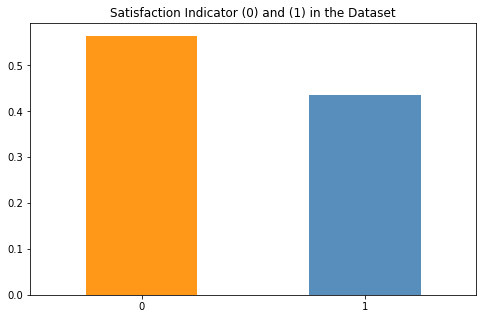

In [ ]:
# Checking the nature of data set: balanced or imbalanced?
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (8,5))
train.satisfaction.value_counts(normalize = True).plot(kind='bar', color= ['darkorange','steelblue'], alpha = 0.9, rot=0)
plt.title('Satisfaction Indicator (0) and (1) in the Dataset')
plt.show()

The above plot shows a distribution of around 55%:45% between neutral/dissatisfied passengers and satisfied passengers respectively. So the data is quite balanced and it does not require any special treatment/resampling.

# Handling of Missing Data

In [ ]:
# Missing data
total = test.isnull().sum().sort_values(ascending=False)
percent = (test.isnull().sum()/test.isnull().count()).sort_values(ascending=False)
missing = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing

,Total,Percent
satisfaction,0,0.0
Food_and_drink,0,0.0
Customer_Type,0,0.0
Age,0,0.0
Type_of_Travel,0,0.0
Class,0,0.0
Flight_Distance,0,0.0
Inflight_wifi_service,0,0.0
Departure/Arrival_time_convenient,0,0.0
Ease_of_Online_booking,0,0.0


In [ ]:
# Imputing missing value with mean
test['Arrival_Delay_in_Minutes'] = test['Arrival_Delay_in_Minutes'].fillna(round(test['Arrival_Delay_in_Minutes'].mean()))
test['Gate_location'] = test['Gate_location'].fillna(round(test['Gate_location'].mean()))
test['Inflight_wifi_service'] = test['Inflight_wifi_service'].fillna(round(test['Inflight_wifi_service'].mean()))
test['Departure/Arrival_time_convenient'] = test['Departure/Arrival_time_convenient'].fillna(round(test['Departure/Arrival_time_convenient'].mean()))
test['Online_boarding'] = test['Online_boarding'].fillna(round(test['Online_boarding'].mean()))
test['On-board_service'] = test['On-board_service'].fillna(round(test['On-board_service'].mean()))
test['Leg_room_service'] = test['Leg_room_service'].fillna(round(test['Leg_room_service'].mean()))
test['Checkin_service'] = test['Checkin_service'].fillna(round(test['Checkin_service'].mean()))
test['Food_and_drink'] = test['Food_and_drink'].fillna(round(test['Food_and_drink'].mean()))
test['Ease_of_Online_booking'] = test['Ease_of_Online_booking'].fillna(round(test['Ease_of_Online_booking'].mean()))

test['Inflight_entertainment']=test['Inflight_entertainment'].fillna(round(test['Inflight_entertainment'].mean()))
test['Cleanliness']=test['Cleanliness'].fillna(round(test['Cleanliness'].mean()))
test['Baggage_handling']=test['Baggage_handling'].fillna(round(test['Baggage_handling'].mean()))
test['Seat_comfort']=test['Seat_comfort'].fillna(round(test['Seat_comfort'].mean()))
test['Inflight_service']=test['Inflight_service'].fillna(round(test['Inflight_service'].mean()))

In [ ]:
# Imputing missing value with mean
train['Arrival_Delay_in_Minutes'] = train['Arrival_Delay_in_Minutes'].fillna(round(train['Arrival_Delay_in_Minutes'].mean()))

In [ ]:
train['Gate_location'] = train['Gate_location'].fillna(round(train['Gate_location'].mean()))
train['Inflight_wifi_service'] = train['Inflight_wifi_service'].fillna(round(train['Inflight_wifi_service'].mean()))
train['Departure/Arrival_time_convenient'] = train['Departure/Arrival_time_convenient'].fillna(round(train['Departure/Arrival_time_convenient'].mean()))
train['Online_boarding'] = train['Online_boarding'].fillna(round(train['Online_boarding'].mean()))
train['On-board_service'] = train['On-board_service'].fillna(train['On-board_service'].mean())
train['Leg_room_service'] = train['Leg_room_service'].fillna(train['Leg_room_service'].mean())
train['Checkin_service'] = train['Checkin_service'].fillna(train['Checkin_service'].mean())
train['Food_and_drink'] = train['Food_and_drink'].fillna(train['Food_and_drink'].mean())
train['Ease_of_Online_booking'] = train['Ease_of_Online_booking'].fillna(train['Ease_of_Online_booking'].mean())

In [ ]:
# Check the list of categorical variables
train.select_dtypes(include=['object']).columns

Index(['Gender', 'Customer_Type', 'Type_of_Travel', 'Class'], dtype='object')

In [ ]:
# Replace NaN with mode for categorical variables
train['Gender'] = train['Gender'].fillna(train['Gender'].mode()[0])
train['Customer_Type'] = train['Customer_Type'].fillna(train['Customer_Type'].mode()[0])
train['Type_of_Travel'] = train['Type_of_Travel'].fillna(train['Type_of_Travel'].mode()[0])
train['Class'] = train['Class'].fillna(train['Class'].mode()[0])

In [ ]:
test['Gender'] = test['Gender'].fillna(test['Gender'].mode()[0])
test['Customer_Type'] = test['Customer_Type'].fillna(test['Customer_Type'].mode()[0])
test['Type_of_Travel'] = test['Type_of_Travel'].fillna(test['Type_of_Travel'].mode()[0])
test['Class'] = test['Class'].fillna(test['Class'].mode()[0])

# Exploratory Data Analysis

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


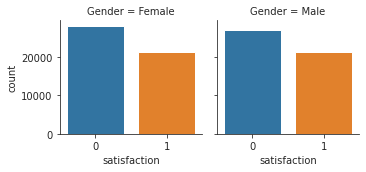

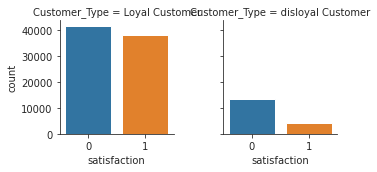

In [ ]:
import seaborn as sns
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Gender", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)  
    g = sns.catplot("satisfaction", col="Customer_Type", col_wrap=2, data=train, kind="count", height=2.5, aspect=1.0)

**Gender:** 
It is observed that gender-wise distribution of dissatisfied and satisfied customers are quite same. For both male and female passengers, no. of dissatisfied customers are on the higher side compared to no. of satisfied customers.

**Customer Type:**
Loyal passengers are very high in number. Even among loyal passengers, the ratio of satisfied and dissatidfied ones are almost 49:51. 

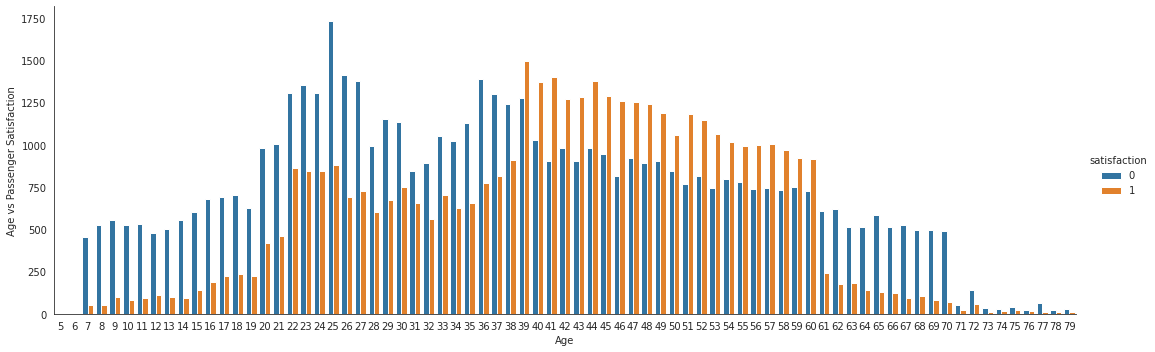

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot("Age", data=train, aspect=3.0, kind='count', hue='satisfaction', order=range(5, 80))
    g.set_ylabels('Age vs Passenger Satisfaction')

**Age:**
From age 7-to-38 and from age 61-to-79, quotient of dissatisfied passengers is very high compared to satisfied passengers. On the contrary, in age range 39-60, quotient of satisfied passengers is higher compared to dissatisfied passengers.

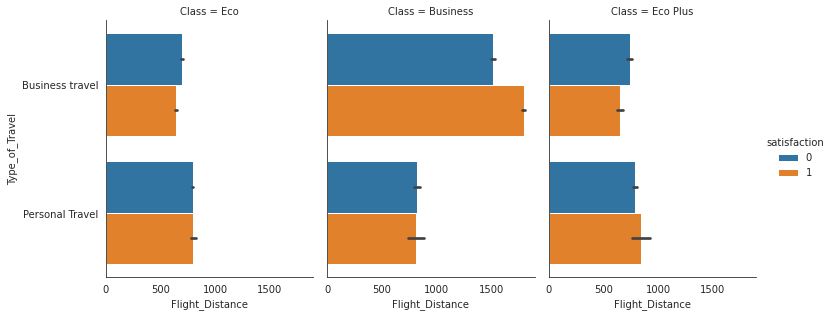

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Flight_Distance", y="Type_of_Travel", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

**Type of Travel, Class, Flight Distance:**
For business travel in business class category, the number of satisfied passengers are quite on the higher side for longer flight distance. For other combinations, there is almost equal distribution of satisfied and dissatisfied passengers.


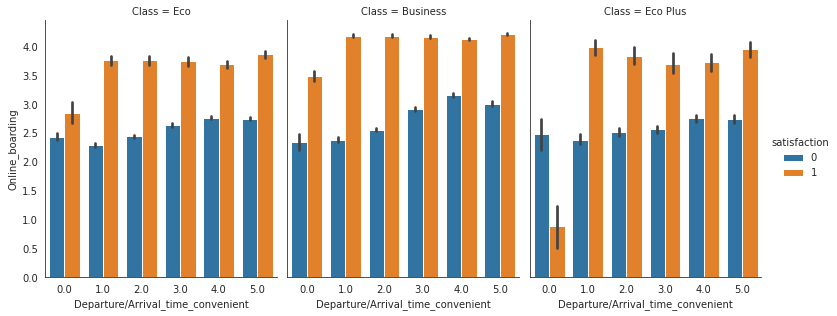

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Departure/Arrival_time_convenient", y="Online_boarding", hue="satisfaction", col="Class", data=train, kind="bar", height=4.5, aspect=.8)

**Online Boarding, Departure/Arrival Time Convenience grouped by Class:**
For Eco Plus class, very inconvenient Departure/Arrival time (Departure/Arrival_time_convenient = 0) has really high no. of dissatisfied passengers, even when online boarding is done very well. For other combinations, no. of satisfied passengers are on the higher side compared to no. of dissatisfied passengers. 

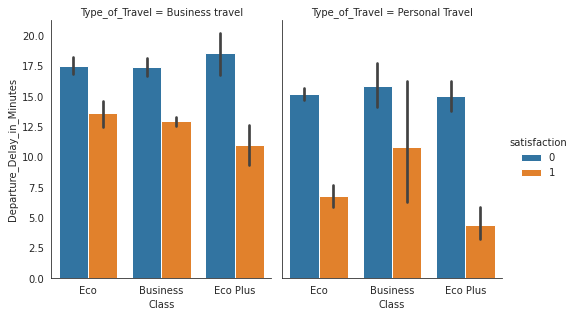

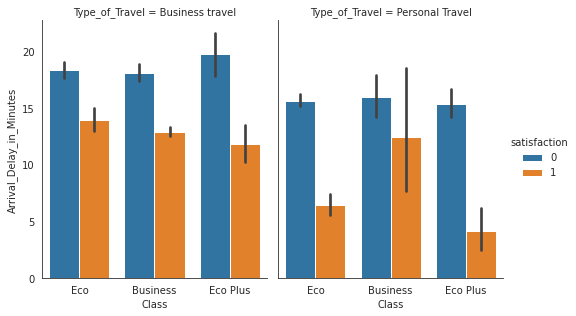

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Class", y="Departure_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)
    g = sns.catplot(x="Class", y="Arrival_Delay_in_Minutes", hue="satisfaction", col="Type_of_Travel", data=train, kind="bar", height=4.5, aspect=.8)

**Departure Delay, Arrival Delay grouped by Type of Travel:**
For personal travel (specially Eco Plus and Eco), the no. of dissatisfied passengers are really high when arrival delay in minutes is high. Now, this is quite obvious. By minute comparison, all combinations have higher no. of dissatisfied passengers compared to no. of satisfied passengers.

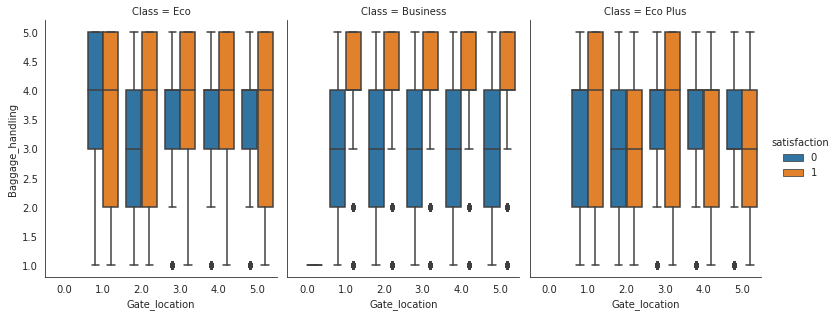

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Gate_location", y="Baggage_handling", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

**Baggage Handling, Gate Location grouped by Class:**
For business class, it is observed that all gate locations have higher no. of dissatisfied passengers when baggage handling is not done perfectly well (rating <= 4). For Eco Plus, when the gate location is 1 and for Eco, when the gate location is 2, even when the baggages are handled in a mediocre way (rating in range 2.0 - 4.0), passengers remained dissatisfied.

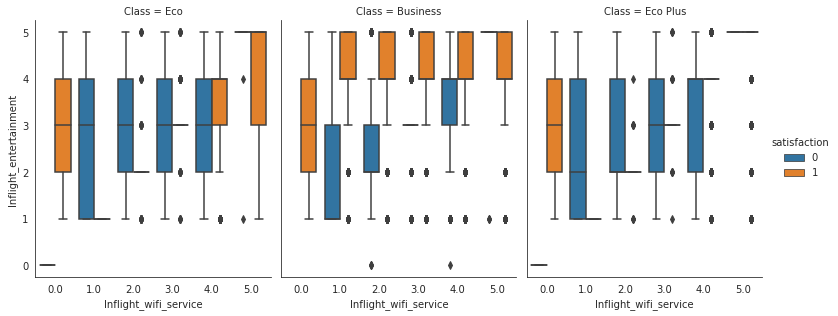

In [ ]:
with sns.axes_style('white'):
    g = sns.catplot(x="Inflight_wifi_service", y="Inflight_entertainment", hue="satisfaction", col="Class", data=train, kind="box", height=4.5, aspect=.8)

**Inflight Entertainment, Inflight wi-fi Service grouped by Class:**
It is interesting to find that Eco Plus passengers are mostly satisfied without in-flight wi-fi service (rating 0) and medium level of in-flight entertainment (rating 2 - 4). For Business class passengers, only highest level of in-flight entertainment (rating 5) can make them satisfied. For Eco passengers, high level of in-flight entertainment (rating 3 - 5) and very high wi-fi service availability (rating 5) can make them satisfied.

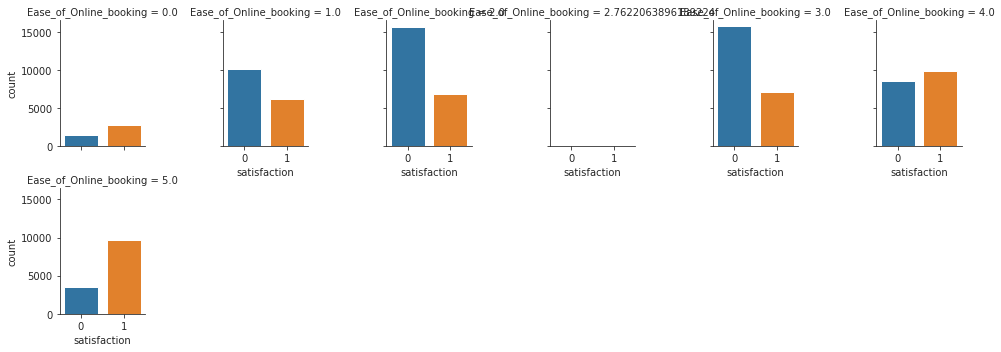

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Ease_of_Online_booking", col_wrap=6, data=train, kind="count", height=2.5, aspect=.9)

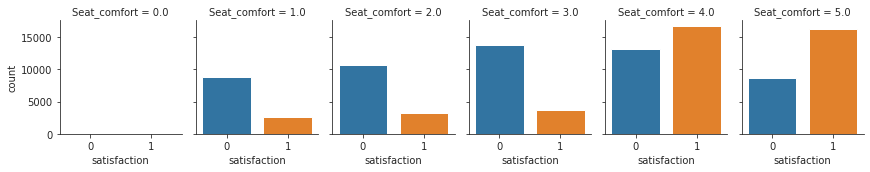

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Seat_comfort", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

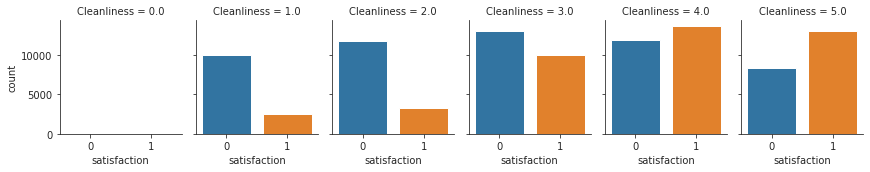

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Cleanliness", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

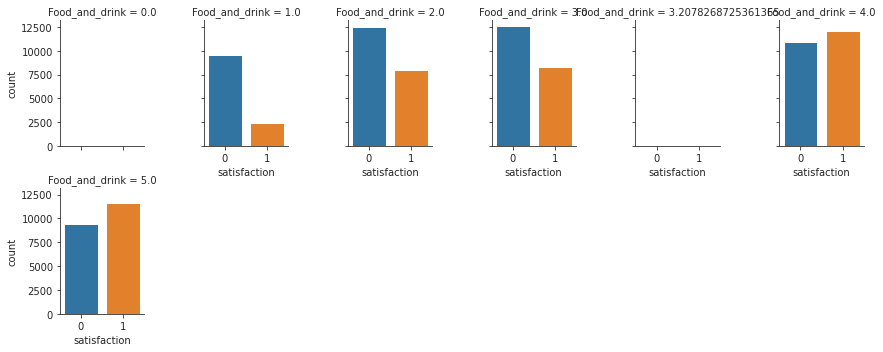

In [ ]:
with sns.axes_style(style='ticks'):
    g = sns.catplot("satisfaction", col="Food_and_drink", col_wrap=6, data=train, kind="count", height=2.5, aspect=.8)

**Ease of Online Booking, Seat Comfort, Cleanliness, Food and Drink:**
For all of these features, maximum no. of satisfied passengers belong to the category of 4 and 5 rating givers. Below rating 4, passengers are mostly dissatisfied.

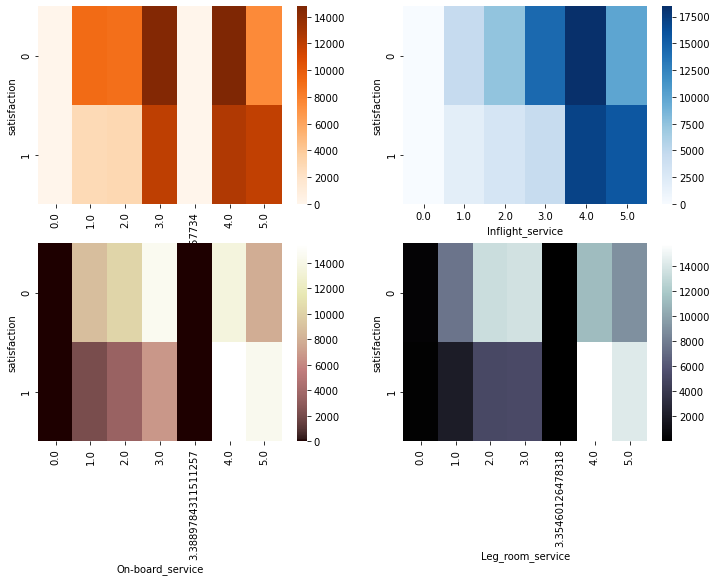

In [ ]:
import matplotlib.pyplot as plt 
fig, axarr = plt.subplots(2, 2, figsize=(12, 8))

table1 = pd.crosstab(train['satisfaction'], train['Checkin_service'])
sns.heatmap(table1, cmap='Oranges', ax = axarr[0][0])
table2 = pd.crosstab(train['satisfaction'], train['Inflight_service'])
sns.heatmap(table2, cmap='Blues', ax = axarr[0][1])
table3 = pd.crosstab(train['satisfaction'], train['On-board_service'])
sns.heatmap(table3, cmap='pink', ax = axarr[1][0])
table4 = pd.crosstab(train['satisfaction'], train['Leg_room_service'])
sns.heatmap(table4, cmap='bone', ax = axarr[1][1])

**Checkin Service, Inflight Service, On-board Service, Leg-room Service:**
For checkin service, 0-2 rating givers are predominantly dissatisfied. For other three services, only 4 and 5 rating givers belong to satisfied passengers category.  

# Label Encoding of Categorical Variables

In [ ]:
from sklearn.preprocessing import LabelEncoder
lencoders = {}
for col in train.select_dtypes(include=['object']).columns:
    lencoders[col] = LabelEncoder()
    train[col] = lencoders[col].fit_transform(train[col])

In [ ]:
lencoders_t = {}
for col in test.select_dtypes(include=['object']).columns:
    lencoders_t[col] = LabelEncoder()
    test[col] = lencoders_t[col].fit_transform(test[col])

# Outliers Detection and Removal

In [ ]:
Q1 = train.quantile(0.25)
Q3 = train.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

Gender                                  1.0
Customer_Type                           0.0
Age                                    24.0
Type_of_Travel                          1.0
Class                                   1.0
Flight_Distance                      1330.0
Inflight_wifi_service                   2.0
Departure/Arrival_time_convenient       2.0
Ease_of_Online_booking                  2.0
Gate_location                           2.0
Food_and_drink                          2.0
Online_boarding                         2.0
Seat_comfort                            3.0
Inflight_entertainment                  2.0
On-board_service                        2.0
Leg_room_service                        2.0
Baggage_handling                        2.0
Checkin_service                         1.0
Inflight_service                        2.0
Cleanliness                             2.0
Departure_Delay_in_Minutes             12.0
Arrival_Delay_in_Minutes               13.0
satisfaction                    

In [ ]:
# Removing outliers from dataset
train = train[~((train < (Q1 - 1.5 * IQR)) |(train > (Q3 + 1.5 * IQR))).any(axis=1)]
train.shape

(57426, 23)

# Correlation among Features

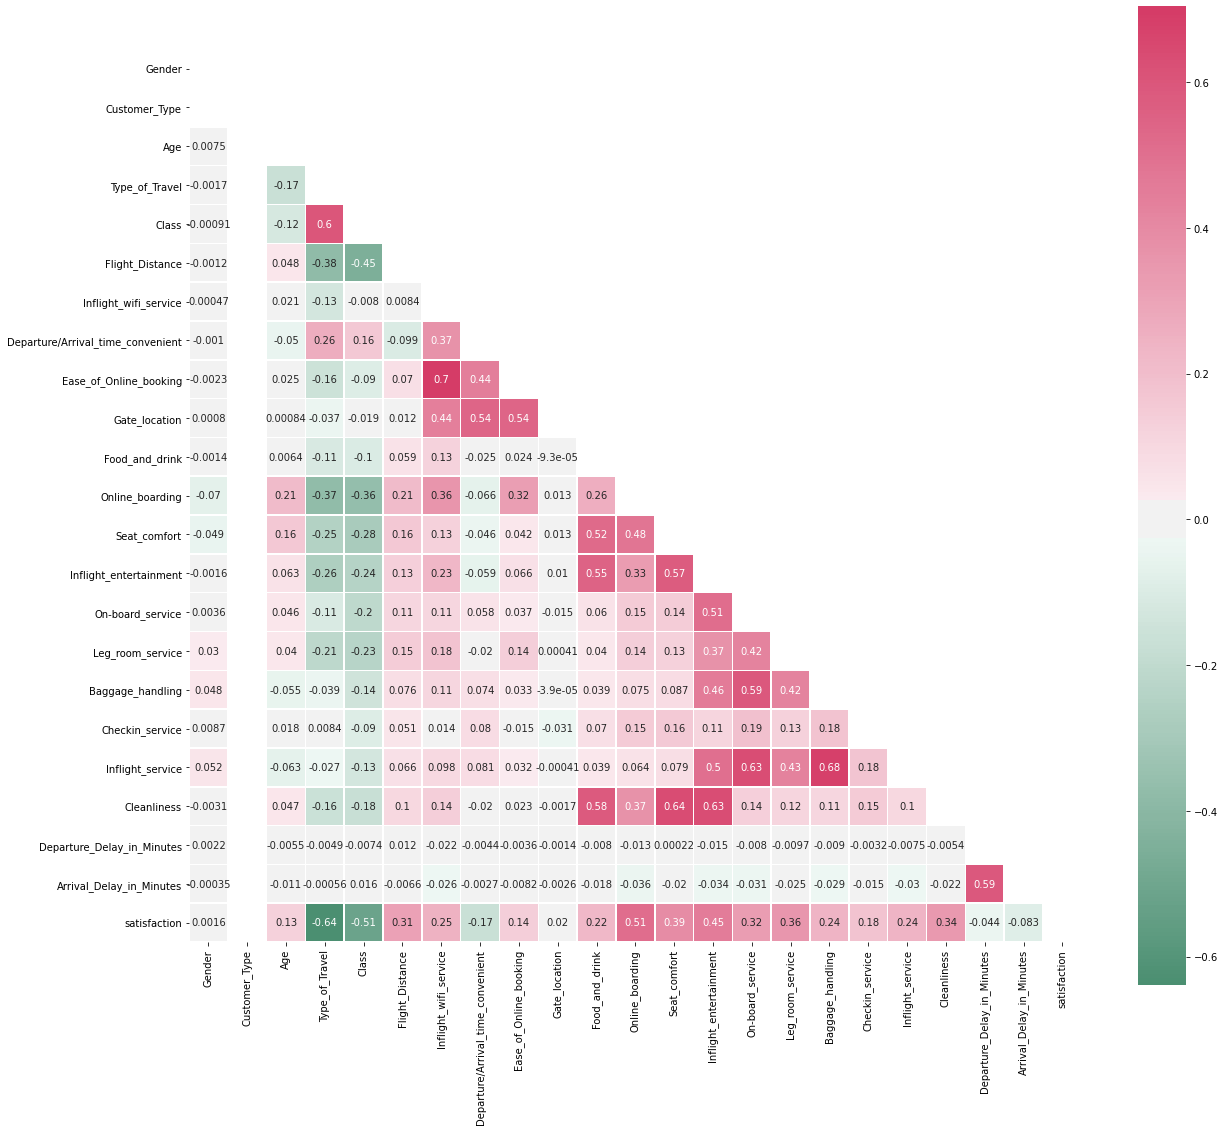

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
corr = train.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(20, 20))
cmap = sns.diverging_palette(150, 1, as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=None, center=0,square=True, annot=True, linewidths=.5, cbar_kws={"shrink": .9})

"Ease_of_Online_booking" is highly correlated with "Inflight_wifi_service". Also "Inflight_service" is highly correlated with "Baggage_handling". But no pair is having corr. coefficient exactly equal to 1. So there is no perfect multicollinearity. Hence we are not discarding any variable. 

# Top 10 Feature Selection through Chi-Square

In [ ]:
from sklearn import preprocessing
r_scaler = preprocessing.MinMaxScaler()
r_scaler.fit(train)
#modified_data = pd.DataFrame(r_scaler.transform(train), index=train['id'], columns=train.columns)
modified_data = pd.DataFrame(r_scaler.transform(train), columns=train.columns)
modified_data.head()

NameError: ignored

In [ ]:
from sklearn.feature_selection import SelectKBest, chi2
X = modified_data.loc[:,modified_data.columns!='satisfaction']
y = modified_data[['satisfaction']]
selector = SelectKBest(chi2, k=10)
selector.fit(X, y)
X_new = selector.transform(X)
print(X.columns[selector.get_support(indices=True)])

These are top 10 features impacting on passenger satisfaction. We will check feature importance with other methods as well.
# Feature Importance using Wrapper Method

In [ ]:
from sklearn.feature_selection import SelectFromModel
from sklearn.ensemble import RandomForestClassifier as rf

X = train.drop('satisfaction', axis=1)
y = train['satisfaction']
selector = SelectFromModel(rf(n_estimators=100, random_state=0))
selector.fit(X, y)
support = selector.get_support()
features = X.loc[:,support].columns.tolist()
print(features)
print(rf(n_estimators=100, random_state=0).fit(X,y).feature_importances_)

['Type_of_Travel', 'Class', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort', 'Inflight_entertainment']
[0.00430556 0.         0.02742168 0.22716848 0.08155515 0.03264732
 0.11043209 0.01602922 0.03045496 0.01430819 0.01224845 0.1150889
 0.06308079 0.06485034 0.02823042 0.04434977 0.02609928 0.02419132
 0.02474231 0.03671114 0.00725266 0.00883197]


So only these six features are inherently important in contributing towards passenger satisfaction. However, we will again cross-check with another feature importance deciding method.
# Feature Permutation Importance

In [ ]:
import warnings
warnings.filterwarnings("ignore")

In [ ]:
!pip install eli5

     |████████████████████████████████| 112kB 2.6MB/s 


In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(rf(n_estimators=100, random_state=0).fit(X,y),random_state=1).fit(X,y)
eli5.show_weights(perm, feature_names = X.columns.tolist())

Weight,Feature
0.2750 ± 0.0029,Type_of_Travel
0.1226 ± 0.0004,Inflight_wifi_service
0.0453 ± 0.0016,Online_boarding
0.0389 ± 0.0007,Seat_comfort
0.0361 ± 0.0009,Checkin_service
0.0320 ± 0.0004,Baggage_handling
0.0296 ± 0.0008,Inflight_service
0.0265 ± 0.0010,Cleanliness
0.0178 ± 0.0015,On-board_service
0.0143 ± 0.0006,Class


From all above results, finally we can combine and conclude the list of important features.

**Really Important Features:** Type_of_Travel, Inflight_wifi_service, Online_boarding, Seat_comfort

**Important Features:** Class, Flight_Distance, Inflight_entertainment, On-board_service, Leg_room_service, Cleanliness, Checkin_service, Inflight_service, Baggage_handling

# Building Models 

In [ ]:
features = ['Type_of_Travel','Inflight_wifi_service','Online_boarding','Seat_comfort','Flight_Distance',
            'Inflight_entertainment','On-board_service','Leg_room_service','Cleanliness','Checkin_service', 
            'Inflight_service', 'Baggage_handling']
target = ['satisfaction']

# Split into test and train
X_train = train[features]
y_train = train[target].to_numpy()
X_test = test[features]
y_test = test[target].to_numpy()

# Normalize Features
#from sklearn.preprocessing import StandardScaler
#scaler = StandardScaler()
#X_train = scaler.fit_transform(X_train)
#X_test = scaler.fit_transform(X_test)

NameError: ignored

In [ ]:
import time
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, plot_confusion_matrix, plot_roc_curve
from matplotlib import pyplot as plt 
def run_model(model, X_train, y_train, X_test, y_test, verbose=True):
    t0=time.time()
    if verbose == False:
        model.fit(X_train,y_train.ravel(), verbose=0)
    else:
        model.fit(X_train,y_train.ravel())
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    roc_auc = roc_auc_score(y_test, y_pred) 
    time_taken = time.time()-t0
    print("Accuracy = {}".format(accuracy))
    print("ROC Area under Curve = {}".format(roc_auc))
    print("Time taken = {}".format(time_taken))
    print(classification_report(y_test,y_pred,digits=5))
    plot_confusion_matrix(model, X_test, y_test,cmap=plt.cm.pink, normalize = 'all')
    plot_roc_curve(model, X_test, y_test)                     
    
    return model, accuracy, roc_auc, time_taken

**Model-1: Logistic Regression penalized with Elastic Net (L1 penalty = 50%, L2 penalty = 50%)**

In [ ]:
np.any(np.isnan(X_test))



NameError: ignored

In [ ]:
from sklearn.linear_model import LogisticRegression

params_lr = {'penalty': 'elasticnet', 'l1_ratio':0.5, 'solver': 'saga'}

model_lr = LogisticRegression(**params_lr)
model_lr, accuracy_lr, roc_auc_lr, tt_lr = run_model(model_lr, X_train, y_train, X_test, y_test)

Since Logistic Regression is a white-box model (explainable), we can dive deeper into it to get more insight. 

In [ ]:
import statsmodels.api as sm
logit_model=sm.Logit(y_train,X_train)
result=logit_model.fit()
print(result.summary())

We can see, among 12 features, except 6th feature (Inflight_entertainment), rest 11 features have p-value < 0.05. So these are really important features impacting highly towards the target variable. Also, a pseudo R-square value **(McFadden's Pseudo R-Squared Value)** of 0.55 represents an excellent fit. 

**Model-2: Naive Bayes Classifier**

In [ ]:
from sklearn.naive_bayes import GaussianNB

params_nb = {}

model_nb = GaussianNB(**params_nb)
model_nb, accuracy_nb, roc_auc_nb, tt_nb = run_model(model_nb, X_train, y_train, X_test, y_test)

**Model-3: K-Nearest Neighbor Classifier**

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

params_kn = {'n_neighbors':10, 'algorithm': 'kd_tree', 'n_jobs':4}

model_kn = KNeighborsClassifier(**params_kn)
model_kn, accuracy_kn, roc_auc_kn, tt_kn = run_model(model_kn, X_train, y_train, X_test, y_test)

Model-4: Decision Tree Classifier

In [ ]:
from sklearn.tree import DecisionTreeClassifier
params_dt = {'max_depth': 12,    
             'max_features': "sqrt"}

model_dt = DecisionTreeClassifier(**params_dt)
model_dt, accuracy_dt, roc_auc_dt, tt_dt = run_model(model_dt, X_train, y_train, X_test, y_test)

Since Decision Tree is a white-box (explainable) model, we can deep-dive into its visualization to get more valuable insight below. From tree-visualization, we can extract rules which are contributing towards passenger-satisfaction.

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz

features_n = ['Type_of_Travel', 'Inflight_wifi_service', 'Online_boarding', 'Seat_comfort']
X_train_n = scaler.fit_transform(train[features_n])
data = export_graphviz(DecisionTreeClassifier(max_depth=3).fit(X_train_n, y_train), out_file=None, 
                       feature_names = features_n,
                       class_names = ['Dissatisfied (0)', 'Satisfied (1)'], 
                       filled = True, rounded = True, special_characters = True)
# we have intentionally kept max_depth short here to accommodate the entire visual-tree, best result comes with max_depth = 12
# we have taken only really important features here to accommodate the entire tree picture
graph = graphviz.Source(data)
graph

From above tree visualization, it can be easily spotted that rule "Type_of_Travel <=0.227 and Seat_comfort <= -0.089 and Online_boarding <= 0.045" (all normalized values) contributes towards passenger satisfaction indicator= 1. Like that, many other rules can be extracted easily by going through the nodes.

**Model-5: Neural Network (Multilayer Perceptron)**

In [ ]:
from sklearn.neural_network import MLPClassifier

params_nn = {'hidden_layer_sizes': (30,30,30),
             'activation': 'logistic',
             'solver': 'lbfgs',
             'max_iter': 100}

model_nn = MLPClassifier(**params_nn)
model_nn, accuracy_nn, roc_auc_nn, tt_nn = run_model(model_nn, X_train, y_train, X_test, y_test)

**Model-6: Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

params_rf = {'max_depth': 16,
             'min_samples_leaf': 1,
             'min_samples_split': 2,
             'n_estimators': 100,
             'random_state': 12345}

model_rf = RandomForestClassifier(**params_rf)
model_rf, accuracy_rf, roc_auc_rf, tt_rf = run_model(model_rf, X_train, y_train, X_test, y_test)

Well, we see that Random Forest has performed very well on both Accuracy and area under ROC curve. So, we are now interested to see **how many decision trees are minimally required make the Accuarcy consistent** (recalling the fact that Random Forest is actually a bagged ensemble of decision trees).

In [ ]:
import numpy as np
%matplotlib inline

trees=range(100)
accuracy=np.zeros(100)

for i in range(len(trees)):
    clf = RandomForestClassifier(n_estimators = i+1)
    model1 = clf.fit(X_train, y_train.ravel())
    y_predictions = model1.predict(X_test)
    accuracy[i] = accuracy_score(y_test, y_predictions)

plt.plot(trees,accuracy)

From above graph, it is evident that **minimum 40 trees** are required to make accuracy fairly consistent (though minimal fluctuation is still there, and we can try the graph after increasing the no. of iterations).

**Model-7: Extreme Gradient Boosting**

In [ ]:
import xgboost as xgb
params_xgb ={'n_estimators': 500,
            'max_depth': 16}

model_xgb = xgb.XGBClassifier(**params_xgb)
model_xgb, accuracy_xgb, roc_auc_xgb, tt_xgb = run_model(model_xgb, X_train, y_train, X_test, y_test)

**Model-8: Adaptive Gradient Boosting**

In [ ]:
from sklearn.ensemble import AdaBoostClassifier as adab
params_adab ={'n_estimators': 500,
              'random_state': 12345}

model_adab = adab(**params_adab)
model_adab, accuracy_adab, roc_auc_adab, tt_adab = run_model(model_adab, X_train, y_train, X_test, y_test)

# Decision Region Plotting for Different Models

We will observe the boundary of decision regions plotted by all the models on training data. Also we will observe the number of misclassified data points in the plots.

In [ ]:
import warnings
warnings.filterwarnings("ignore")

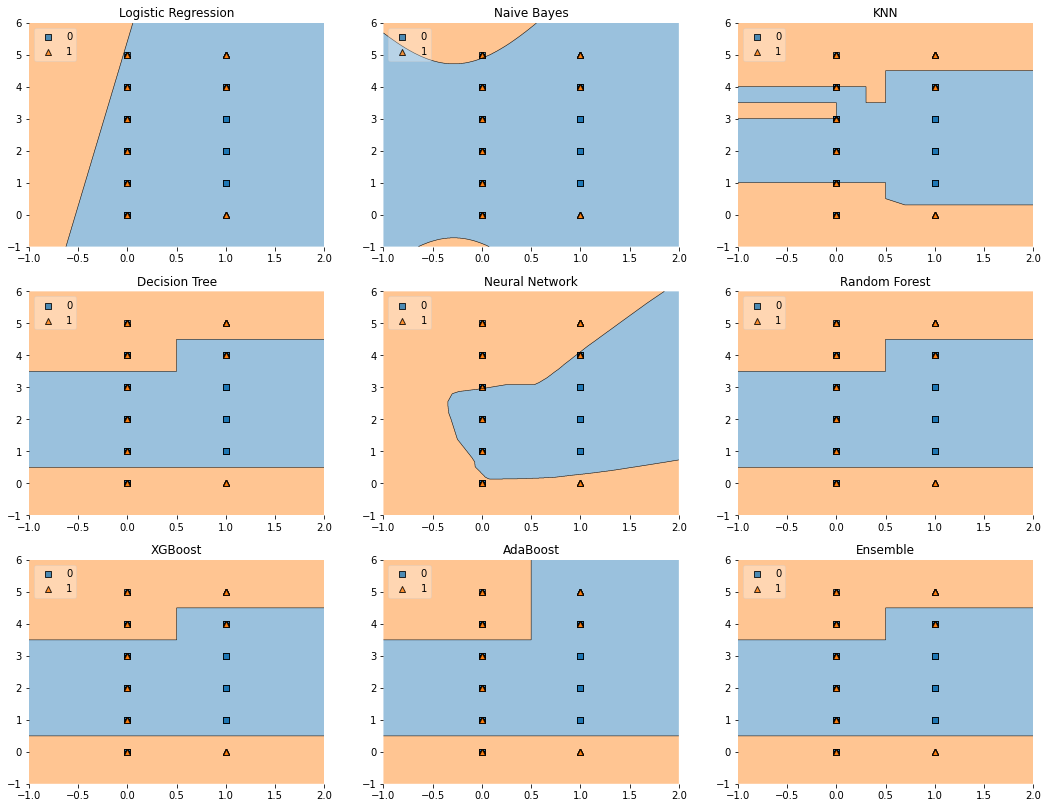

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import itertools
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb
from sklearn.ensemble import AdaBoostClassifier
from mlxtend.classifier import EnsembleVoteClassifier
from mlxtend.plotting import plot_decision_regions

value = 1.70
width = 0.85

clf1 = LogisticRegression(random_state=12345)
clf2 = GaussianNB()
clf3 = KNeighborsClassifier()
clf4 = DecisionTreeClassifier(random_state=12345) 
clf5 = MLPClassifier(random_state=12345, verbose = 0)
clf6 = RandomForestClassifier(random_state=12345)
clf7 = xgb.XGBClassifier(random_state=12345)
clf8 = AdaBoostClassifier(random_state=12345)
eclf = EnsembleVoteClassifier(clfs=[clf6, clf7, clf8], weights=[1, 1, 1], voting='soft')

X_list = train[["Type_of_Travel", "Inflight_wifi_service", "Online_boarding", "Seat_comfort"]] #took only really important features
X = np.asarray(X_list, dtype=np.float32)
y_list = train["satisfaction"]
y = np.asarray(y_list, dtype=np.int32)

# Plotting Decision Regions
gs = gridspec.GridSpec(3,3)
fig = plt.figure(figsize=(18, 14))

labels = ['Logistic Regression',
          'Naive Bayes',
          'KNN',
          'Decision Tree',
          'Neural Network',
          'Random Forest',
          'XGBoost',
          'AdaBoost',
          'Ensemble']

for clf, lab, grd in zip([clf1, clf2, clf3, clf4, clf5, clf6, clf7, clf8, eclf],
                         labels,
                         itertools.product([0, 1, 2],
                         repeat=2)):
    clf.fit(X, y)
    ax = plt.subplot(gs[grd[0], grd[1]])
    fig = plot_decision_regions(X=X, y=y, clf=clf, 
                                filler_feature_values={2: value, 3: value}, 
                                filler_feature_ranges={2: width, 3: width}, 
                                legend=2)
    plt.title(lab)

plt.show()

# Model Comparison:
We will compare the performace of various models by their respective ROC_AUC score and total time taken for execution.

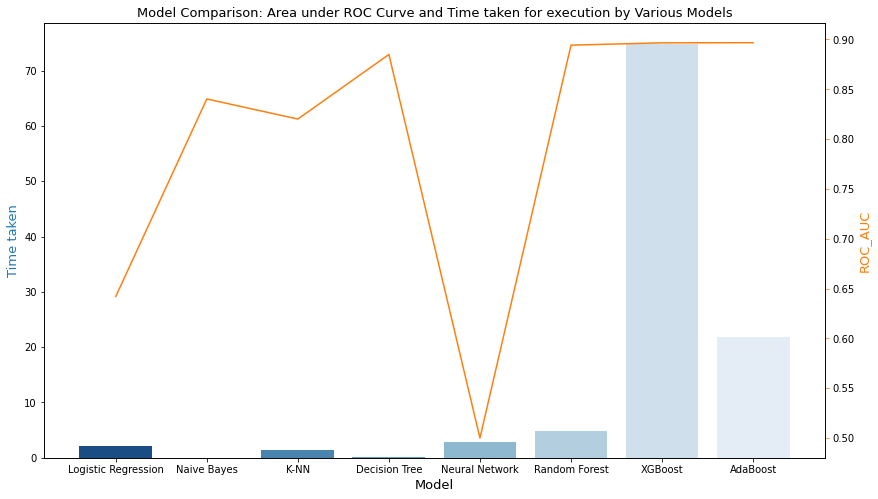

In [ ]:
roc_auc_scores = [roc_auc_lr, roc_auc_nb, roc_auc_kn, roc_auc_dt, roc_auc_nn, roc_auc_rf, roc_auc_xgb, roc_auc_adab]
tt = [tt_lr, tt_nb, tt_kn, tt_dt, tt_nn, tt_rf, tt_xgb, tt_adab]

model_data = {'Model': ['Logistic Regression','Naive Bayes','K-NN','Decision Tree','Neural Network','Random Forest','XGBoost','AdaBoost'],
              'ROC_AUC': roc_auc_scores,
              'Time taken': tt}
data = pd.DataFrame(model_data)

fig, ax1 = plt.subplots(figsize=(14,8))
ax1.set_title('Model Comparison: Area under ROC Curve and Time taken for execution by Various Models', fontsize=13)
color = 'tab:blue'
ax1.set_xlabel('Model', fontsize=13)
ax1.set_ylabel('Time taken', fontsize=13, color=color)
ax2 = sns.barplot(x='Model', y='Time taken', data = data, palette='Blues_r')
ax1.tick_params(axis='y')
ax2 = ax1.twinx()
color = 'tab:orange'
ax2.set_ylabel('ROC_AUC', fontsize=13, color=color)
ax2 = sns.lineplot(x='Model', y='ROC_AUC', data = data, sort=False, color=color)
ax2.tick_params(axis='y', color=color)

# Conclusion
We observe, Random Forest and AdaBoost have performed equally well on producing high ROC_AUC score (90%). But **Random Forest** has taken lesser amount of time compared to time taken by AdaBoost. So, we will stick to Random Forest as the best model. 
